# UNAD - Analisis de datos

Estudiante: Christian Daniel Ospina Valencia

Tarea 5 - Proyecto Análisis de Datos


Grupo: 202016908_51

Tutor: Handry Orozco

Diciembre 1 de 2024

### Arboles de decisiones

### Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

### 1. Análisis exploratorio de datos (EDA)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

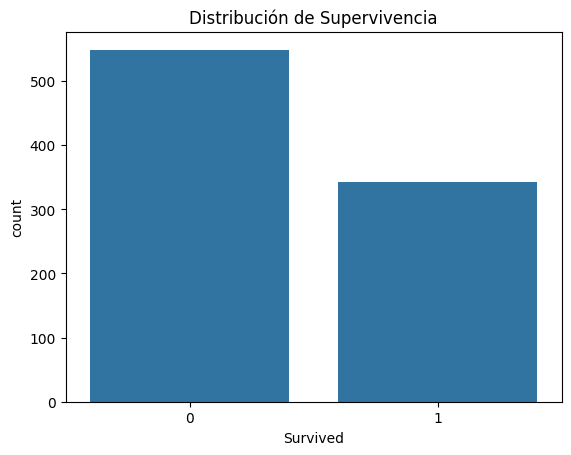

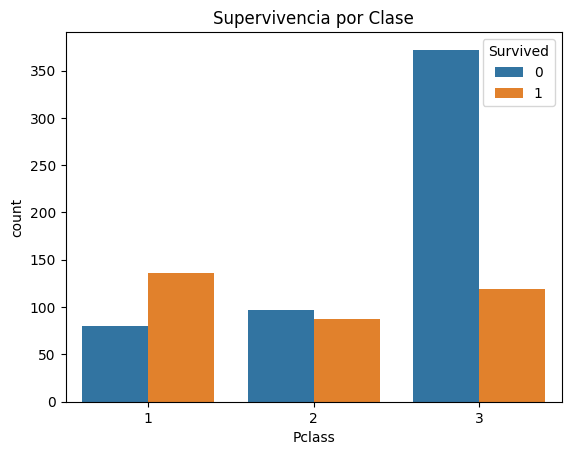

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv("titanic_dataset.csv")

# Ver las primeras filas
print(data.head())

# Información general del dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Visualización de las distribuciones
sns.countplot(data=data, x='Survived')
plt.title("Distribución de Supervivencia")
plt.show()

sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title("Supervivencia por Clase")
plt.show()

# Verificar valores faltantes
print(data.isnull().sum())

### 2. Preprocesamiento de datos

In [3]:
# Llenar valores faltantes en 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Eliminar columnas irrelevantes ('Name', 'Ticket', 'Cabin')
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Codificar variables categóricas ('Sex', 'Embarked')
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Ver el dataset preprocesado
print(data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


### 3. Selección de características

In [4]:
from sklearn.feature_selection import SelectKBest, chi2

# Separar características y etiqueta
X = data.drop('Survived', axis=1)
y = data['Survived']

# Selección de características usando chi-cuadrado
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X, y)

print("Características seleccionadas:\n", X.columns[selector.get_support()])

Características seleccionadas:
 Index(['Pclass', 'Age', 'Parch', 'Fare', 'Sex_male'], dtype='object')


### 4. División Train/Test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (712, 5)
Tamaño del conjunto de prueba: (179, 5)


### 5. Entrenamiento del modelo

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Configuración del modelo
model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

### 6. Evaluación del modelo

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusión:
 [[92 13]
 [23 51]]
Precisión: 0.7988826815642458


### 7. Visualización

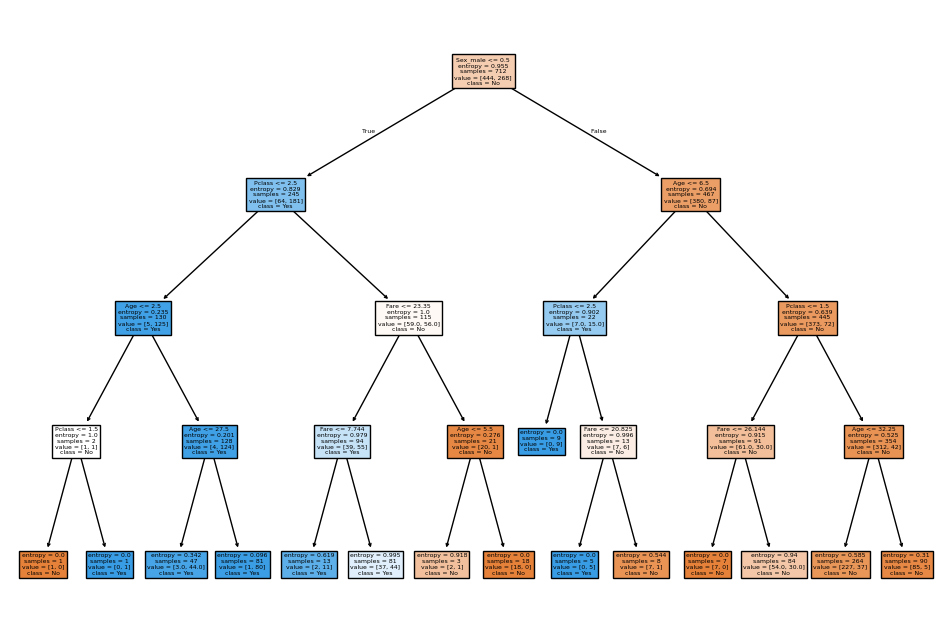

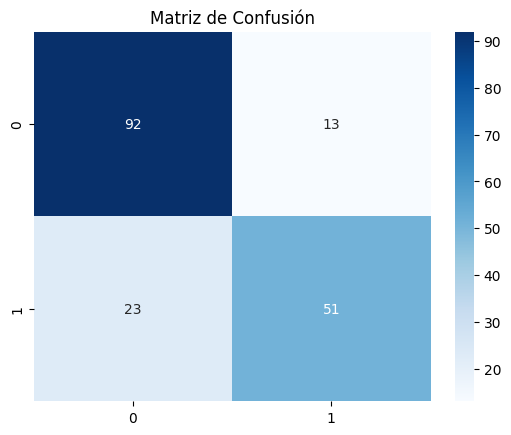

In [8]:
from sklearn.tree import plot_tree

# Visualizar el árbol
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns[selector.get_support()], class_names=['No', 'Yes'], filled=True)
plt.show()

# Gráfica de la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()